In [13]:
from splinter import Browser
from splinter.exceptions import ElementDoesNotExist
from bs4 import BeautifulSoup
import requests
import pandas as pd
from selenium import webdriver as driver
import matplotlib as plt

In [14]:
#logic in this cell scrapes the data, cleans it up and put it in a dataframe called new_df

tables = pd.read_html("https://www.nps.gov/aboutus/visitation-numbers.htm")
visit = tables[2]
new_df = pd.DataFrame([{"Year":"","Visitors":""}])
new_df.head()
# create a list to store the year values
years = []
# create a list to store the visitor values
visitors = []


visit

# iterate over every row in the data
for index, row in visit.iterrows():
    # iterate over every column in the row
    for i in range(0,row.size):
        # if the column position is divisible by 2
        if i % 2 == 0:
            # add to year list
            years.append(row[i])
        else:
            # else add to visitor list
            visitors.append(str(row[i]).replace(".",""))

#years
new_df = pd.DataFrame(years, visitors).reset_index()
new_df.dropna(inplace=True)
new_df.info()



new_df = new_df[new_df['index']!='nan']
# new_df = new_df.rename(columns={"index":"Visitors", 0:"Year"})
# new_df["Visitors"] = pd.to_numeric(new_df["Visitors"])

new_df.info()

new_df

new_df = new_df.rename(columns={"index":"Visitors", 0:"Year" })
new_df.head()

new_df = new_df[new_df.Year != "Total"]
#df.drop('reports', axis=1)
#df[df.name != 'Tina']

new_df["Visitors"]=pd.to_numeric(new_df["Visitors"])
new_df["Year"]=pd.to_numeric(new_df["Year"])

new_df = new_df.sort_values(by=['Year'])

new_df



<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 128
Data columns (total 2 columns):
index    116 non-null object
0        116 non-null object
dtypes: object(2)
memory usage: 2.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 128
Data columns (total 2 columns):
index    116 non-null object
0        116 non-null object
dtypes: object(2)
memory usage: 2.7+ KB


,Visitors,Year
0,120690,1904
5,140954,1905
10,30569,1906
15,32935,1907
20,42768,1908
25,60899,1909
30,173416,1910
35,194207,1911
40,198334,1912
45,216853,1913


In [ ]:
#This is create a database and put new_df to a sqlite database
from sqlalchemy import create_engine
engine = create_engine('sqlite:///natpark.db', echo=False)
new_df.to_sql('visits', con=engine, if_exists='replace')

AttributeError: module 'matplotlib' has no attribute 'show'

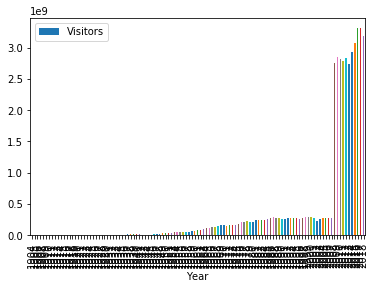

In [16]:
# ax = new_df[['Visitors', 'Year']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
# ax.set_xlabel("Hour", fontsize=12)
# ax.set_ylabel("V", fontsize=12)

new_df.plot(kind='bar',x='Year',y='Visitors')

# y_pos = new_df["Visitors"]
# x_pos = new_df["Year"]
# plt.bar(y_pos, x_pos, align='center', alpha=0.5)

# # objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
# # y_pos = np.arange(len(objects))
# # performance = [10,8,6,4,2,1]
 
# # plt.bar(y_pos, performance, align='center', alpha=0.5)
# # plt.xticks(y_pos, objects)
# # plt.ylabel('Usage')
# # plt.title('Programming language usage')
 
plt.show()

In [ ]:
#junk catcher cell
#This is just different things I have tried before getting the code that works.


visit = soup.findAll('div', class_='table-wrapper')
visit[2]
visit_pd = pd.read_html(visit)
visit_pd

years = [ int(x) for x in years ]
visitors = [ int(x) for x in visitors]

#numbers = [ int(x) for x in numbers ]
#years = map(int, years)
#results = map(int, results)

visit.rename(columns={0:"year1",
                      2:"year2",
                     4:"year3", 
                      6:"year4",
                     8:"year5"},
             inplace=True)
visit.head()

# apminder.rename(columns={'pop':'population',
#                           'lifeExp':'life_exp',
#                           'gdpPercap':'gdp_per_cap'}, 
#                  inplace=True)

del visitNum
visitNum = first.append(second)
visitNum
#df1.append(df2)
visitNum = pd.concat([first, second], keys=['year1', 'year2'])
visitNum
#pd.concat([x, y], keys=['x', 'y'])

first = visit[["year1",1]]
second = visit[["year2",3]]
first.head()


from sqlalchemy import create_engine
import pandas as pd

engine = sqlalchemy.create_engine('sqlite:///my.db', echo=False)
df = pd.DataFrame([[1,2],[1,2]], columns=['a', 'b'])

df.to_sql('mytable', con=engine, if_exists='append')

url = "https://www.nps.gov/aboutus/visitation-numbers.htm"
browser = Browser('chrome')
#browser = Browser.visit(url)
browser.visit(url)
html = browser.html
soup = BeautifulSoup(html, 'html.parser')